In [2]:
import plotly
plotly.__version__

'1.12.9'

In [11]:
import plotly.plotly as py
from plotly.graph_objs import *

py.sign_in('ipeirotis', 'iys6jgwd1k')

In [134]:
import requests
import json
import geopandas as gpd

In [135]:
# US States GeoJSON file from http://eric.clst.org/Stuff/USGeoJSON
# url_states = 'http://eric.clst.org/wupl/Stuff/gz_2010_us_040_00_500k.json' # high detail
url_states = 'http://eric.clst.org/wupl/Stuff/gz_2010_us_040_00_20m.json' # low detail
states_geojson = json.loads(requests.get(url_states).text)["features"]
df_states = gpd.GeoDataFrame.from_features(states_geojson)
df_states.set_index('STATE',inplace=True)
df_states.sort_index(inplace=True)


In [127]:
df_states.drop('02' , inplace=True) #drop Alaska
df_states.drop('15' , inplace=True) #drop Hawaii
df_states.drop('72' , inplace=True) #drop Puerto Rico

df_states.head()

,CENSUSAREA,GEO_ID,LSAD,NAME,geometry
STATE,,,,,
01,50645.326,0400000US01,,Alabama,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
04,113594.084,0400000US04,,Arizona,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
05,52035.477,0400000US05,,Arkansas,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
06,155779.220,0400000US06,,California,"(POLYGON ((-120.248484 33.999329, -120.247393 ..."
08,103641.888,0400000US08,,Colorado,"POLYGON ((-107.317794 41.002957, -107.000606 4..."


In [136]:
# US Counties GeoJSON
url_counties = 'http://eric.clst.org/wupl/Stuff/gz_2010_us_050_00_20m.json'
counties_geojson = json.loads(requests.get(url_counties).text)["features"]
df_counties = gpd.GeoDataFrame.from_features(counties_geojson)
df_counties.set_index(['STATE','COUNTY'],inplace=True)
df_counties.sort_index(inplace=True)


CENSUSAREA          GEO_ID    LSAD           NAME  \
STATE COUNTY                                                      
01    001        594.436  0500000US01001  County        Autauga   
      003       1589.784  0500000US01003  County        Baldwin   
      005        884.876  0500000US01005  County        Barbour   
      007        622.582  0500000US01007  County           Bibb   
      009        644.776  0500000US01009  County         Blount   
      011        622.805  0500000US01011  County        Bullock   
      013        776.829  0500000US01013  County         Butler   
      015        605.868  0500000US01015  County        Calhoun   
      017        596.531  0500000US01017  County       Chambers   
      019        553.700  0500000US01019  County       Cherokee   
      021        692.854  0500000US01021  County        Chilton   
      023        913.500  0500000US01023  County        Choctaw   
      025       1238.465  0500000US01025  County         Clarke   
      027        603.961  0500000US01027  County           Clay   
      029        560.100  0500000US01029  County       Cleburne   
      031        678.972  0500000US01031  County         Coffee   
      033        592.619  0500000US01033  County        Colbert   
      035        850.156  0500000US01035  County        Conecuh   
      037        650.926  0500000US01037  County          Coosa   
      039       1030.456  0500000US01039  County      Covington   
      041        608.840  0500000US01041  County       Crenshaw   
      043        734.841  0500000US01043  County        Cullman   
      045        561.150  0500000US01045  County           Dale   
      047        978.695  0500000US01047  County         Dallas   
      049        777.093  0500000US01049  County         DeKalb   
      051        618.485  0500000US01051  County         Elmore   
      053        945.080  0500000US01053  County       Escambia   
      055        534.991  0500000US01055  County         Etowah   
      057        627.660  0500000US01057  County        Fayette   
      059        633.821  0500000US01059  County       Franklin   
...                  ...             ...     ...            ...   
72    095         21.066  0500000US72095    Muno        Maunabo   
      097         77.645  0500000US72097    Muno       Mayagüez   
      099         50.344  0500000US72099    Muno           Moca   
      101         38.871  0500000US72101    Muno        Morovis   
      103         51.661  0500000US72103    Muno        Naguabo   
      105         27.401  0500000US72105    Muno      Naranjito   
      107         63.620  0500000US72107    Muno       Orocovis   
      109         46.699  0500000US72109    Muno       Patillas   
      111         44.617  0500000US72111    Muno       Peñuelas   
      113        114.762  0500000US72113    Muno          Ponce   
      115         22.683  0500000US72115    Muno   Quebradillas   
      117         14.288  0500000US72117    Muno         Rincón   
      119         60.623  0500000US72119    Muno     Río Grande   
      121         35.833  0500000US72121    Muno  Sabana Grande   
      123         69.365  0500000US72123    Muno        Salinas   
      125         54.498  0500000US72125    Muno     San Germán   
      127         47.847  0500000US72127    Muno       San Juan   
      129         53.108  0500000US72129    Muno    San Lorenzo   
      131         70.423  0500000US72131    Muno  San Sebastián   
      133         34.023  0500000US72133    Muno   Santa Isabel   
      135         27.016  0500000US72135    Muno       Toa Alta   
      137         23.241  0500000US72137    Muno       Toa Baja   
      139         20.764  0500000US72139    Muno  Trujillo Alto   
      141        113.529  0500000US72141    Muno         Utuado   
      143         27.728  0500000US72143    Muno      Vega Alta   
      145         45.856  0500000US72145    Muno      Vega Baja   
      147         50.768  0500000US72147    Muno        Viequ

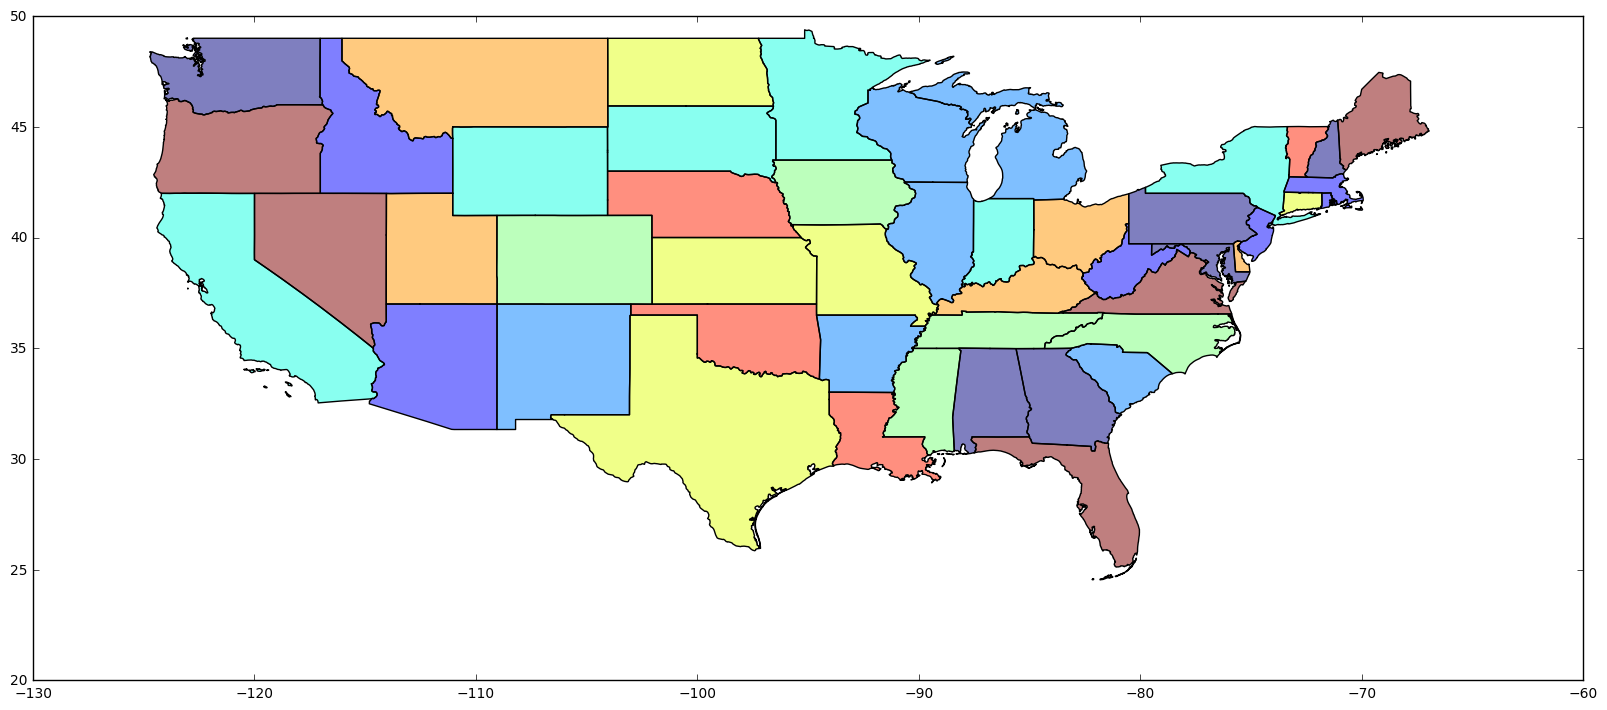

In [129]:
df_states.plot(figsize=(20,30))

In [130]:
class Census:
    def __init__(self, key):
        self.key = key

    def get(self, fields, geo, year=2010, dataset='sf1'):
        fields = [','.join(fields)]
        base_url = 'http://api.census.gov/data/{year}/{dataset}?key={key}&get='.format(year=str(year), dataset=dataset, key=self.key)
        query = fields
        for item in geo:
            query.append(item)
        add_url = '&'.join(query)
        url = base_url + add_url
        req = urllib.request.Request(url)
        response = requests.get(url)
        return response.text
    
c = Census('627d4107b57d4576f2120d2b87b59c7440e5d2af')

In [131]:
state = c.get(['P0010001'], ['for=state:*'])
df_state_population = pd.DataFrame(ast.literal_eval(state), columns = ['Population', 'STATE'])
df_state_population['Population'] = pd.to_numeric(df_state_population['Population'],errors='coerce')
df_state_population.drop(0,axis=0,inplace=True)
df_state_population.set_index('STATE',inplace=True)
df_state_population.sort_index(inplace=True)
#df_state_population

county = c.get(['P0010001'], ['in=state:*', 'for=county:*'])
df_county_population = pd.DataFrame(ast.literal_eval(county), columns = ['Population', 'STATE'])
# county_result = ast.literal_eval(county)

# city = c.get(['P0010001'], ['in=state:25', 'for=place:*'])
# city_result = ast.literal_eval(city)

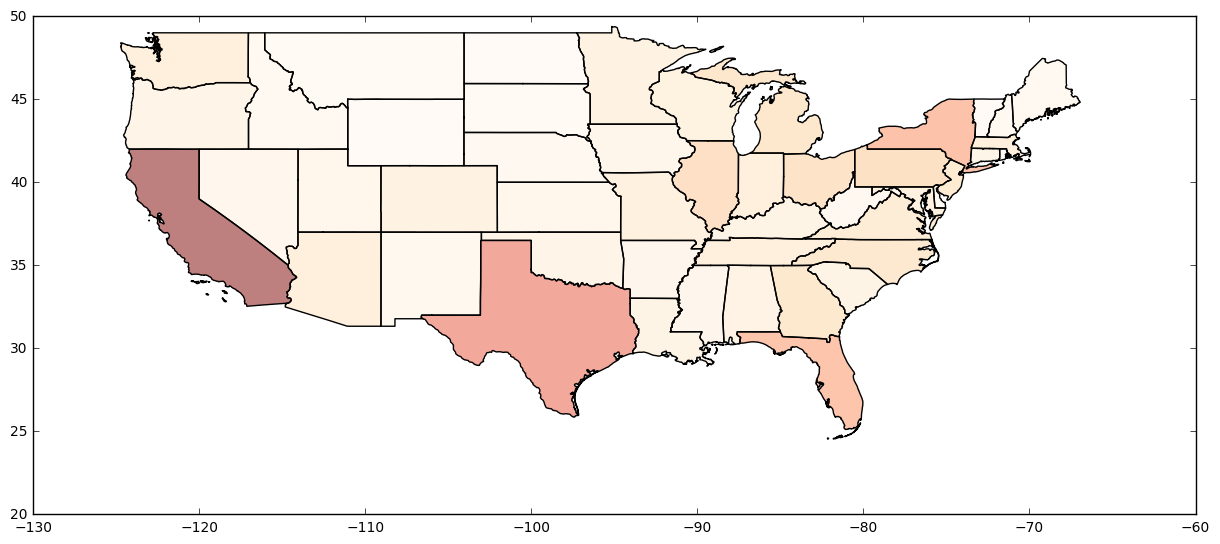

In [133]:
df_join = df_states.join(df_state_population)
df_join.plot(figsize=(15,7), column='Population', cmap='OrRd')

In [104]:
df_join.dtypes

CENSUSAREA    float64
GEO_ID         object
LSAD           object
NAME           object
geometry       object
Population     object
dtype: object

In [7]:
df_unemployment.describe()

,series_id,area_type_code,area_code,measure_code,seasonal,srd_code,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
count,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294
unique,8294,14,8215,1,2,53,8242,2,17,1,3,2
top,LAUCN170470000000003,F,ST4100000000000,03,U,23,"Unemployment Rate: St. Louis city, MO (U)",,1990,M01,2015,M12
freq,1,3222,2,8294,8215,574,2,8291,7610,8294,8272,8189


In [51]:
import requests
import json
import prettytable
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LAUCN360610000000003','LAUCN360630000000003'],"startyear":"1990", "endyear":"2015"})
p = requests.post('http://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)


In [52]:
json_data['Results']['series'][0].keys()

dict_keys(['seriesID', 'data'])

In [53]:
df = []
for series in json_data['Results']['series']:
    seriesId = series['seriesID']
    df_series = pd.DataFrame(series['data'], dtype=float)
    df_series["seriesId"] = seriesId
    df.append({'series': seriesId, 'dataframe': df_series})

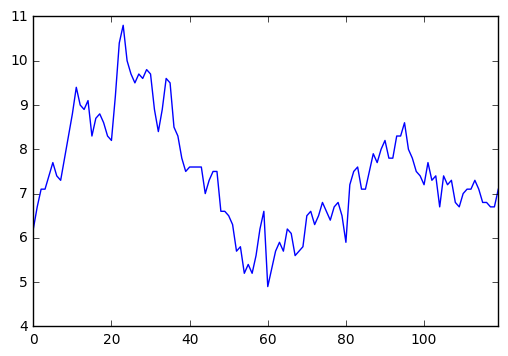

In [54]:
%matplotlib inline
df[0]["dataframe"]["value"].plot()

In [10]:
!curl https://raw.githubusercontent.com/python-visualization/folium/master/examples/us_counties_20m_topo.json -o us_counties_20m_topo.json
!curl https://raw.githubusercontent.com/python-visualization/folium/master/examples/us_county_data.csv -o us_county_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  729k  100  729k    0     0   724k      0  0:00:01  0:00:01 --:--:--  724k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  175k  100  175k    0     0   758k      0 --:--:-- --:--:-- --:--:--  756k


In [19]:

import folium
import pandas as pd
from IPython.display import display

county_data = r'us_county_data.csv'
county_geo = r'us_counties_20m_topo.json'

#Read into Dataframe, cast to string for consistency
df = pd.read_csv(county_data, na_values=[' '])
df['FIPS_Code'] = df['FIPS_Code'].astype(str)


def set_id(fips):
    '''Modify FIPS code to match GeoJSON property'''
    if fips == '0':
        return None
    elif len(fips) <= 4:
        return ''.join(['0500000US0', fips])
    else:
        return ''.join(['0500000US', fips])

#Apply set_id, drop NaN
df['GEO_ID'] = df['FIPS_Code'].apply(set_id)
df = df.dropna()

map_3 = folium.Map(location=[40, -99], zoom_start=4)
map_3.geo_json(geo_path=county_geo, data_out='data3.json', data=df,
               columns=['GEO_ID', 'Median_Household_Income_2011'],
               key_on='feature.id',
               fill_color='PuRd', line_opacity=0.3,
               legend_name='Median Household Income 2011 ($)',
               topojson='objects.us_counties_20m')
#map_3.create_map(path='map_3.html')

display(map_3)

KeyError: u'0500000US72013'

In [16]:
import folium
map_osm = folium.Map(location=[45.5236, -122.6750])
display(map_osm)